In [1]:
from gensim.models import KeyedVectors
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import matplotlib.pyplot as plt

In [26]:
# 加载模型
model = KeyedVectors.load_word2vec_format('清洗后文本.txt')

In [27]:
word_embeddings = model.vectors
words = model.index_to_key

In [28]:
# 使用 t-SNE 进行降维
tsne = TSNE(n_components=2, random_state=42)
tsne_embeddings = tsne.fit_transform(word_embeddings)

In [30]:
# 找到词语的位置
word = words.index("additive")

In [31]:
# 计算 "perovskite" 与其他词语之间的余弦相似性
cosine_similarities = cosine_similarity(word_embeddings, [word_embeddings[word]])

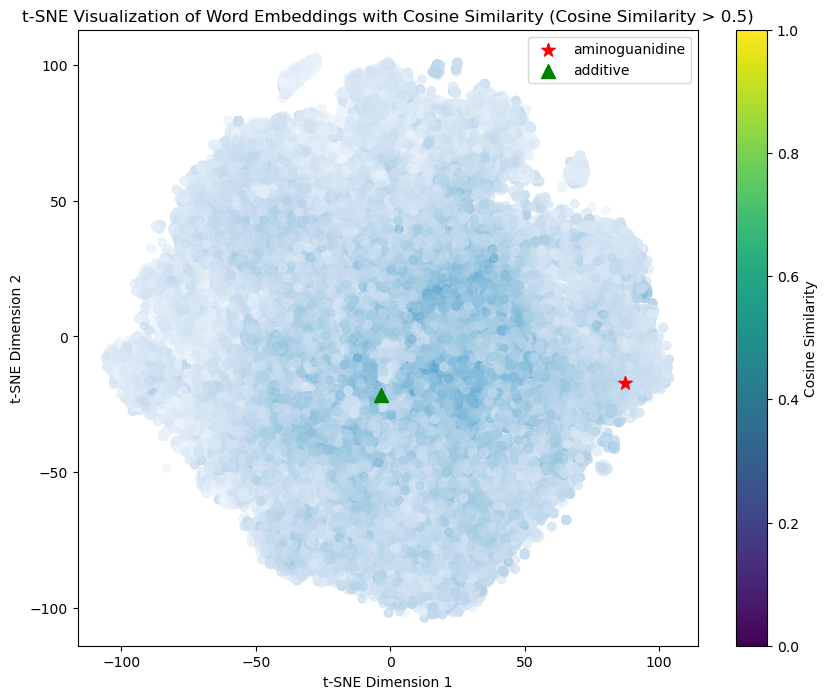

In [39]:
# 找到 "ETL" 的位置

word1_index = words.index("aminoguanidine")
word2_index = words.index("additive")

# 可视化词向量图
plt.figure(figsize=(10, 8))

# 根据余弦相似性调整颜色深浅并绘制散点图
colors = plt.cm.Blues(cosine_similarities.ravel())  # 将二维数组展平为一维，并根据余弦相似性设置颜色深浅
plt.scatter(tsne_embeddings[:, 0], tsne_embeddings[:, 1], c=colors, alpha=0.5)

# # 只显示余弦相似性大于0.5的点
# threshold_similarity = 0.55
# for i, similarity in enumerate(cosine_similarities):
#     if similarity > threshold_similarity:
#         plt.scatter(tsne_embeddings[i, 0], tsne_embeddings[i, 1], c='violet', alpha=0.5)


plt.scatter(tsne_embeddings[word1_index, 0], tsne_embeddings[word1_index, 1], c='red', marker='*', s=100, label='aminoguanidine')

plt.scatter(tsne_embeddings[word2_index, 0], tsne_embeddings[word2_index, 1], c='green', marker='^', s=100, label='additive')

plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE Visualization of Word Embeddings with Cosine Similarity (Cosine Similarity > 0.5)')
plt.legend()

# 添加颜色条
cbar = plt.colorbar()
cbar.set_label('Cosine Similarity')
# plt.axis([-100, 100, -60, 60])
plt.savefig('ETL_solvent.png')  # 可以将文件名修改为您想要的文件名和路径

plt.show()


In [29]:
# for key, value in model.most_similar('additive', topn=100000):
#     print(key)